# **Analyse de l'indice bourcier CAC40, analyse et prévision de l'action MC.PA**


In [12]:
# Importation des bibliothéques nécessaires pour l'analyse de l'indice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader, get_quote_yahoo
import yfinance as yahooFinance
import yfinance as yf
import yfinance as yahooFinance
import datetime as dt
import warnings
warnings.filterwarnings("ignore")


In [13]:
# Scraping de la base de donnée principale sur wikipedia 
cac40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[4]
cac40


Company                  Sector  \
0                 Air Liquide         Basic Materials   
1                      Airbus             Industrials   
2                      Alstom             Industrials   
3               ArcelorMittal         Basic Materials   
4                         AXA      Financial Services   
5                 BNP Paribas      Financial Services   
6                    Bouygues             Industrials   
7                   Capgemini              Technology   
8                   Carrefour      Consumer Defensive   
9             Crédit Agricole      Financial Services   
10                     Danone      Consumer Defensive   
11          Dassault Systèmes              Technology   
12                      Engie               Utilities   
13           EssilorLuxottica              Healthcare   
14        Eurofins Scientific              Healthcare   
15                     Hermès       Consumer Cyclical   
16                     Kering       Consumer Cyclical   
17                    L'Oréal      Consumer Defensive   
18                    Legrand             Industrials   
19                       LVMH       Consumer Cyclical   
20                   Michelin             Industrials   
21                     Orange  Communication Services   
22              Pernod Ricard      Consumer Defensive   
23                   Publicis  Communication Services   
24                    Renault       Consumer Cyclical   
25                     Safran             Industrials   
26               Saint-Gobain             Industrials   
27                     Sanofi              Healthcare   
28         Schneider Electric             Industrials   
29           Société Générale      Financial Services   
30                 Stellantis       Consumer Cyclical   
31         STMicroelectronics              Technology   
32            Teleperformance  Communication Services   
33                     Thales             Industrials   
34              TotalEnergies                  Energy   
35  Unibail-Rodamco-Westfield             Real Estate   
36                     Veolia             Industrials   
37                      Vinci             Industrials   
38                    Vivendi  Communication Services   
39                  Worldline              Technology   

                        GICS Sub-Industry    Ticker  
0                        Industrial Gases     AI.PA  
1                     Aerospace & Defense    AIR.PA  
2                          Rail Transport    ALO.PA  
3                                   Steel     MT.AS  
4                 Life & Health Insurance     CS.PA  
5                       Diversified Banks    BNP.PA  
6              Construction & Engineering     EN.PA  
7          IT Consulting & Other Services    CAP.PA  
8            Hypermarkets & Super Centers     CA.PA  
9                          Regional Banks    ACA.PA  
10                 Packaged Foods & Meats     BN.PA  
11                   Application Software    DSY.PA  
12                          Gas Utilities   ENGI.PA  
13    Apparel, Accessories & Luxury Goods     EL.PA  
14                        Biotechnologies    ERF.PA  
15    Apparel, Accessories & Luxury Goods    RMS.PA  
16    Apparel, Accessories & Luxury Goods    KER.PA  
17                      Personal Products     OR.PA  
18      Electrical Components & Equipment     LR.PA  
19    Apparel, Accessories & Luxury Goods     MC.PA  
20                         Tires & Rubber     ML.PA  
21  Integrated Telecommunication Services    ORA.PA  
22                  Distillers & Vintners     RI.PA  
23                            Advertising    PUB.PA  
24               Automobile Manufacturers    RNO.PA  
25                    Aerospace & Defense    SAF.PA  
26                      Building Products    SGO.PA  
27                        Pharmaceuticals    SAN.PA  
28      Electrical Components & Equipment     SU.PA  
29                      Diversified Banks    GLE.PA  
30        

In [14]:
# Transformation de la colonne tickers en liste
tickers = cac40['Ticker'].to_list()
tickers

['AI.PA',
 'AIR.PA',
 'ALO.PA',
 'MT.AS',
 'CS.PA',
 'BNP.PA',
 'EN.PA',
 'CAP.PA',
 'CA.PA',
 'ACA.PA',
 'BN.PA',
 'DSY.PA',
 'ENGI.PA',
 'EL.PA',
 'ERF.PA',
 'RMS.PA',
 'KER.PA',
 'OR.PA',
 'LR.PA',
 'MC.PA',
 'ML.PA',
 'ORA.PA',
 'RI.PA',
 'PUB.PA',
 'RNO.PA',
 'SAF.PA',
 'SGO.PA',
 'SAN.PA',
 'SU.PA',
 'GLE.PA',
 'STLAP.PA',
 'STM.PA',
 'TEP.PA',
 'HO.PA',
 'TTE.PA',
 'URW.AS',
 'VIE.PA',
 'DG.PA',
 'VIV.PA',
 'WLN.PA']

In [15]:
# Récupération des capitalisations bourssiéres depuis le site yahoo finance à l'aide de la liste des tickers
market_cap = get_quote_yahoo(tickers)['marketCap']
market_cap.head()

AI.PA     77594361856
AIR.PA    95609421824
ALO.PA    10282010624
MT.AS     23149651968
CS.PA     68034101248
Name: marketCap, dtype: int64

In [16]:
# Création d'une colonne Market Capitalization
cac40['Market Capitalization'] = market_cap.values

# Changement d'unité en milliards d'euros
cac40['Market Capitalization'] = cac40['Market Capitalization'] / 1000000000

#definir la colonne 'Ticker' comme indices de lignes de la dataframe 
cac40.set_index('Ticker', inplace = True)
cac40.head()

Company              Sector        GICS Sub-Industry  \
Ticker                                                               
AI.PA     Air Liquide     Basic Materials         Industrial Gases   
AIR.PA         Airbus         Industrials      Aerospace & Defense   
ALO.PA         Alstom         Industrials           Rail Transport   
MT.AS   ArcelorMittal     Basic Materials                    Steel   
CS.PA             AXA  Financial Services  Life & Health Insurance   

        Market Capitalization  
Ticker                         
AI.PA               77.594362  
AIR.PA              95.609422  
ALO.PA              10.282011  
MT.AS               23.149652  
CS.PA               68.034101

<AxesSubplot:title={'center':'Capitalisation bourssiére des entreprises composantes du CAC40'}, xlabel='Company'>

<Figure size 640x480 with 0 Axes>

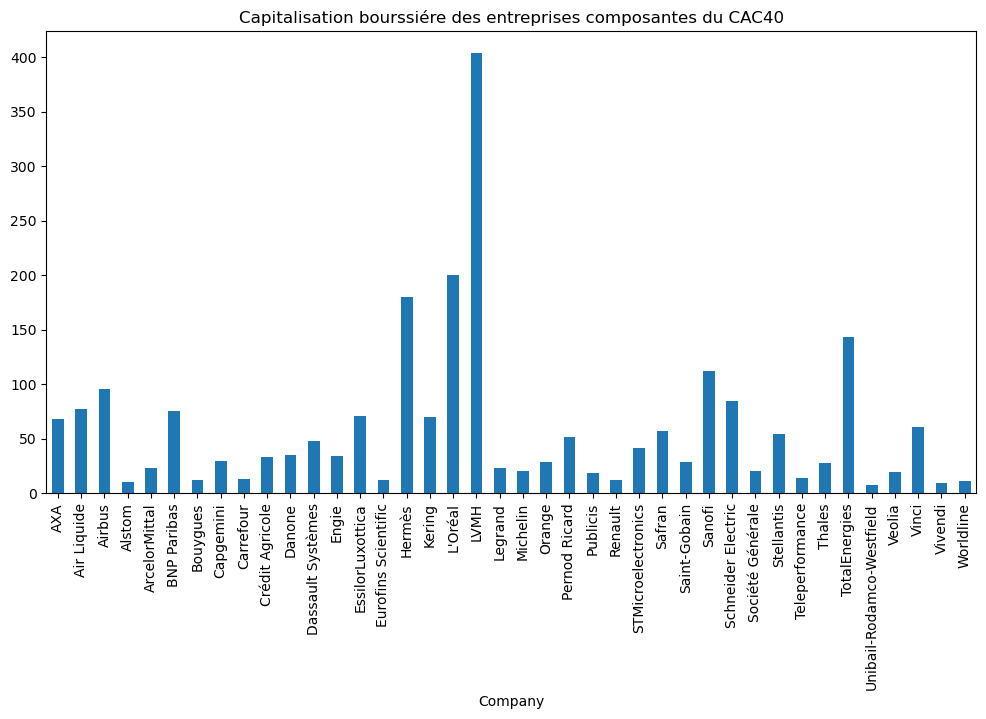

In [35]:
# Affichage d'un graphique à barres representant la capitalisation bourssiére des entreprises composantes de l'indice CAC40
plt.figure('Capitalisation bourssiére des entreprises composantes du CAC40')
plt.figure(figsize=(12,6))
plt.title('Capitalisation bourssiére des entreprises composantes du CAC40')
cac40.groupby(['Company'])['Market Capitalization'].mean().plot(kind = 'bar')

In [20]:
# Recherche de la plus grande entreprise par secteur !
composantes = cac40.groupby('Sector')['Market Capitalization'].nlargest(1)
composantes

Sector                  Ticker 
Basic Materials         AI.PA       77.594362
Communication Services  ORA.PA      28.795787
Consumer Cyclical       MC.PA      403.793805
Consumer Defensive      OR.PA      199.944421
Energy                  TTE.PA     143.463580
Financial Services      BNP.PA      75.446944
Healthcare              SAN.PA     111.928091
Industrials             AIR.PA      95.609422
Real Estate             URW.AS       7.975682
Technology              DSY.PA      47.502950
Utilities               ENGI.PA     33.869255
Name: Market Capitalization, dtype: float64

In [21]:
# Transformation du résultat en une dataframe
composantes = composantes.reset_index()
composantes

Sector   Ticker  Market Capitalization
0          Basic Materials    AI.PA              77.594362
1   Communication Services   ORA.PA              28.795787
2        Consumer Cyclical    MC.PA             403.793805
3       Consumer Defensive    OR.PA             199.944421
4                   Energy   TTE.PA             143.463580
5       Financial Services   BNP.PA              75.446944
6               Healthcare   SAN.PA             111.928091
7              Industrials   AIR.PA              95.609422
8              Real Estate   URW.AS               7.975682
9               Technology   DSY.PA              47.502950
10               Utilities  ENGI.PA              33.869255

In [22]:
# Classement par ordre décroissant de capitalisation boursière
composantes.sort_values(by = 'Market Capitalization', ascending = False)

Sector   Ticker  Market Capitalization
2        Consumer Cyclical    MC.PA             403.793805
3       Consumer Defensive    OR.PA             199.944421
4                   Energy   TTE.PA             143.463580
6               Healthcare   SAN.PA             111.928091
7              Industrials   AIR.PA              95.609422
0          Basic Materials    AI.PA              77.594362
5       Financial Services   BNP.PA              75.446944
9               Technology   DSY.PA              47.502950
10               Utilities  ENGI.PA              33.869255
1   Communication Services   ORA.PA              28.795787
8              Real Estate   URW.AS               7.975682

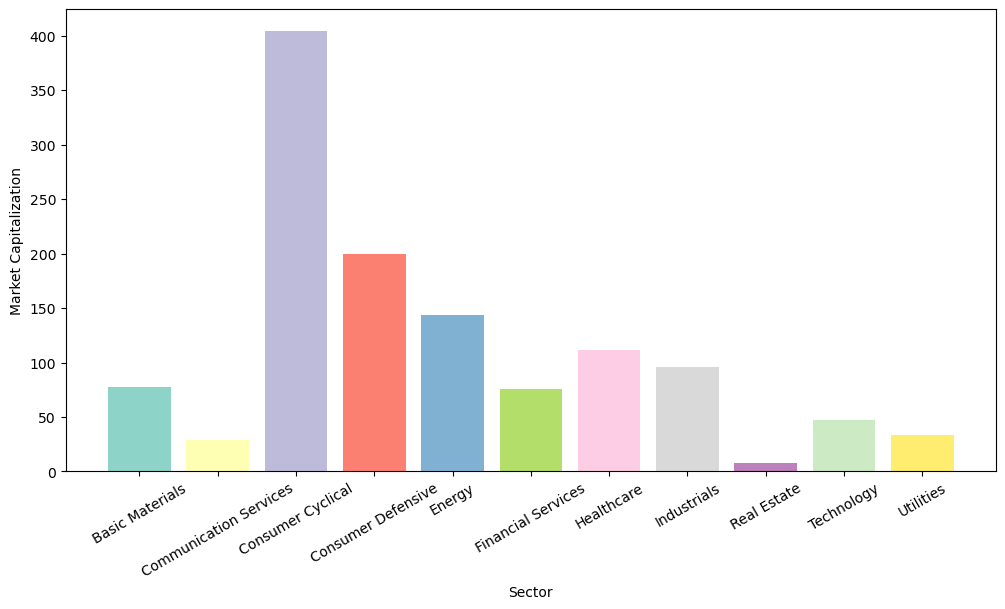

In [32]:
# Création d'une palette de 11 couleurs
colors = plt.cm.Set3(np.linspace(0, 1, 11))

# Création de la figure et de l'axe
fig, ax = plt.subplots(figsize=(12,6))

# Création du graphique avec deux colonnes
ax.bar(composantes['Sector'], composantes['Market Capitalization'], color=colors)

# Configuration de l'axe des abscisses et des ordonnées
ax.set_xlabel('Sector')
ax.set_ylabel('Market Capitalization')
ax.set_xticklabels(composantes['Sector'], rotation=30)

# Affichage du graphique agrandi
plt.show()


In [36]:
# Création d'une liste des symboles des plus grandes entreprises
symbols = composantes['Ticker'].to_list()
symbols

['AI.PA',
 'ORA.PA',
 'MC.PA',
 'OR.PA',
 'TTE.PA',
 'BNP.PA',
 'SAN.PA',
 'AIR.PA',
 'URW.AS',
 'DSY.PA',
 'ENGI.PA']

In [37]:
# Téléchargement des prix journaliers de clôture de 2000 à 2023
start_ = dt.datetime.strptime('2000-01-01',"%Y-%m-%d")
stop = dt.datetime.strptime('2023-02-20',"%Y-%m-%d")
stocks_prices = yf.download(symbols,start=start_, end=stop)['Adj Close']
stocks_prices.head()

[*********************100%***********************]  11 of 11 completed


AI.PA  AIR.PA     BNP.PA    DSY.PA    ENGI.PA      MC.PA  \
Date                                                                       
2000-01-03  16.351423     NaN  15.061358  5.669176  10.364450  57.441425   
2000-01-04  15.625767     NaN  14.638011  5.110597  10.182961  52.007774   
2000-01-05  15.480635     NaN  14.328639  4.714588  10.040357  50.248295   
2000-01-06  16.593306     NaN  13.840166  4.772948  10.176478  49.679062   
2000-01-07  16.390125     NaN  14.019272  5.002216   9.982019  49.679062   

                OR.PA     ORA.PA     SAN.PA     TTE.PA     URW.AS  
Date                                                               
2000-01-03  54.507801  37.896149  19.196323  10.438011  10.233078  
2000-01-04  50.639057  35.871166  18.002525  10.058446  10.404984  
2000-01-05  48.911949  33.990829  17.243265   9.805404  10.395161  
2000-01-06  50.777229  33.556896  17.907015   9.520731  10.707041  
2000-01-07  51.813492  34.569382  18.862055   9.568175  10.640737

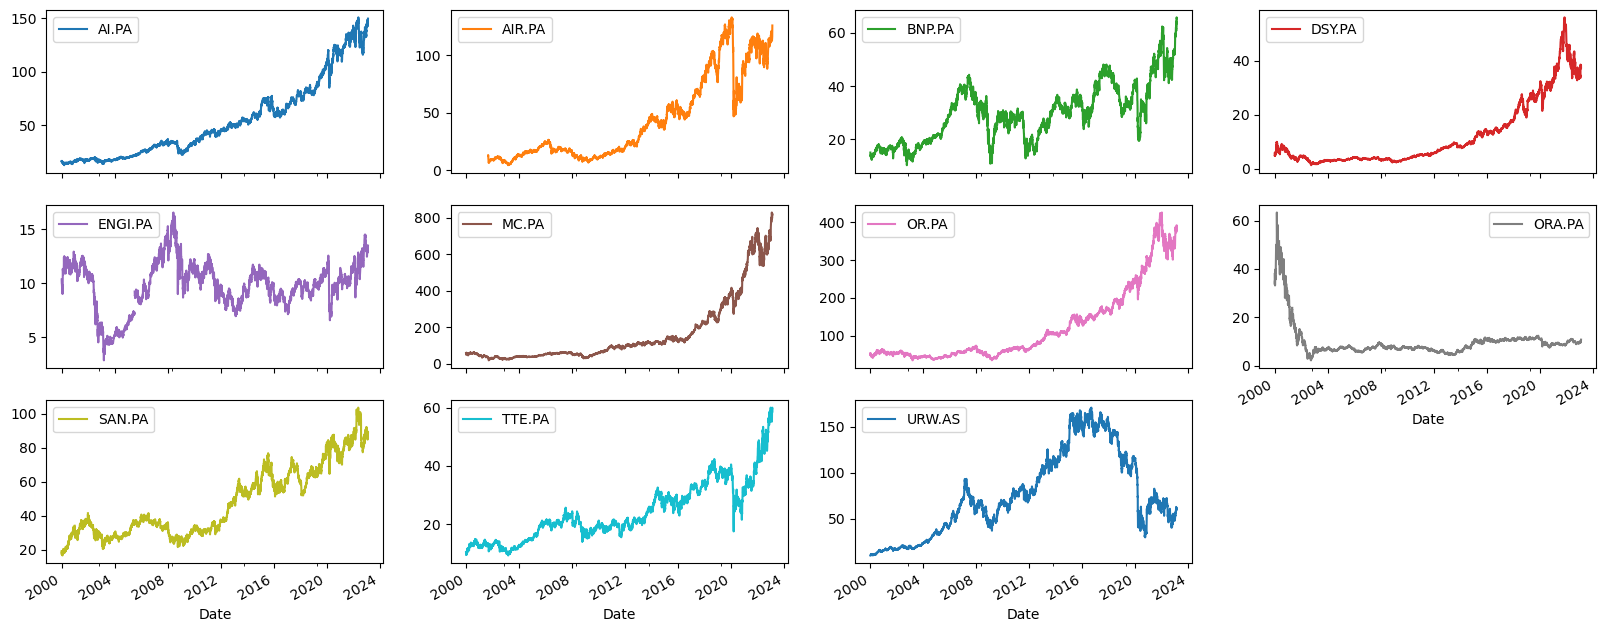

In [38]:
stocks_prices.plot(
    subplots = True, 
    layout = (4, 4), 
    figsize = (20, 11), 
    # Tous les graphiques ont les mêmes valeurs dans l'axe des abscisses
    sharex = True, 
    # Les axes des ordonnées sont différents
    sharey = False) 
plt.show()

Text(0.5, 1.0, "L'évolution des prix journaliers de cloture des actions des 11 grandes entreprises du CAC40")

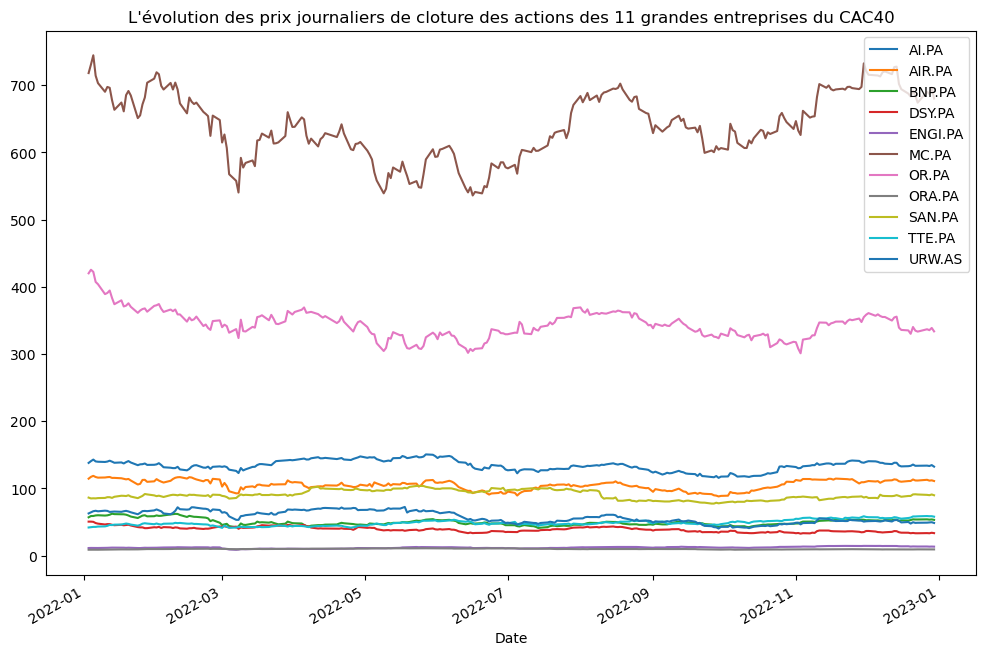

In [39]:
#affichage graphique des actions des plus grandes entreprises qui compose l'indice CAC40
stocks_prices['2022'].plot(figsize=(12, 8))
plt.title("L'évolution des prix journaliers de cloture des actions des 11 grandes entreprises du CAC40")

In [40]:
#selectionner l'action la plus chére dans la bource de paris
stocks_prices = stocks_prices.loc[:, ['MC.PA']]

In [41]:
# Transformation du résultat en une dataframe
stocks_prices = stocks_prices.reset_index()
stocks_prices.head()

Date      MC.PA
0 2000-01-03  57.441425
1 2000-01-04  52.007774
2 2000-01-05  50.248295
3 2000-01-06  49.679062
4 2000-01-07  49.679062

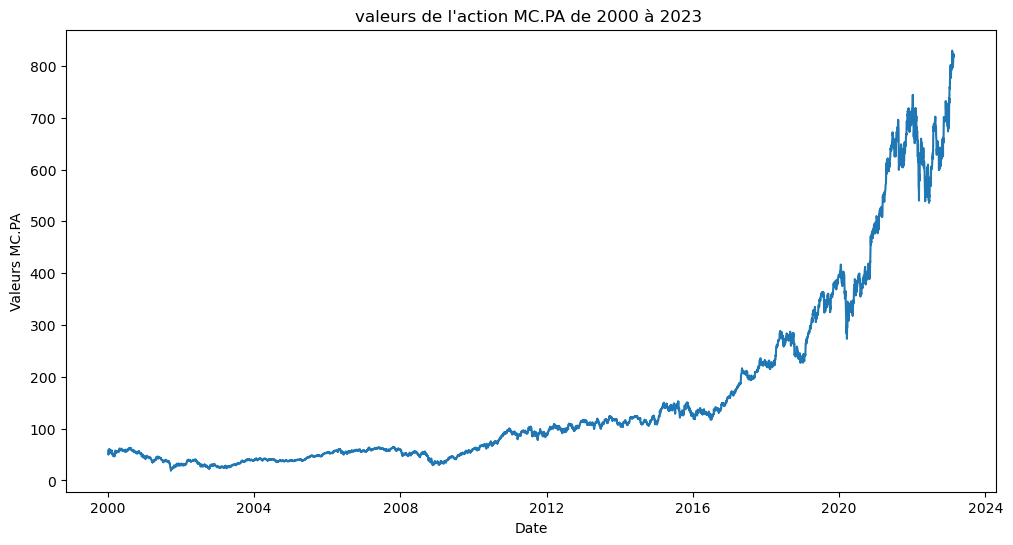

In [45]:
# Inversion de l'ordre chronologique
stocks_prices = stocks_prices[::-1]

# Configuration de la figure
fig = plt.figure(figsize=(12, 6)) 

# Configuration du graphique avec deux colonnes
plt.plot(stocks_prices['Date'], stocks_prices['MC.PA'])

# Configuration de l'axe des abscisses et des ordonnées
plt.xlabel('Date')
plt.ylabel('Valeurs MC.PA')
plt.title("valeurs de l'action MC.PA de 2000 à 2023 ")

# Affichage du graphique agrandi
plt.show()

### on peut conclure que le prix de l'action MC.PA a été multiplié par 16 durant les 23 derniéres années.

# Analyse et prévision de la série temporelle de l'action MC.PA de la Société  Louis Vuitton.

In [46]:
# Importation des librairies nécessaires pour la prévision
# plotly express pour la boite a moustache
import plotly.express as px 
from plotly import tools
import plotly.graph_objs as go
import gc
 
# prophet model 
from prophet import Prophet

# prophet preformance
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from IPython.display import set_matplotlib_formats

In [47]:
# Charger les données à partir d'un fichier CSV
data = pd.read_csv('C:/Users/mmeri/Downloads/MCPA.csv')
data

Date        Open        High         Low       Close   Adj Close  \
0     2000-03-01   76.720001   76.900002   74.599998   76.739998   49.640244   
1     2000-03-02   76.000000   76.559998   74.199997   75.800003   49.032204   
2     2000-03-03   73.620003   74.800003   72.000000   73.000000   47.220978   
3     2000-03-06   72.980003   73.180000   70.199997   71.300003   46.121311   
4     2000-03-07   70.800003   76.800003   70.620003   75.000000   48.514713   
...          ...         ...         ...         ...         ...         ...   
5868  2022-12-23  681.500000  683.200012  670.099976  673.799988  673.799988   
5869  2022-12-27  683.299988  692.700012  682.299988  690.200012  690.200012   
5870  2022-12-28  692.299988  694.700012  685.799988  686.599976  686.599976   
5871  2022-12-29  684.700012  699.000000  682.200012  696.500000  696.500000   
5872  2022-12-30  696.599976  696.599976  676.599976  679.900024  679.900024   

         Volume  
0      730665.0  
1      801500.0  
2     1242345.0  
3     1451610.0  
4     2170085.0  
...         ...  
5868   241292.0  
5869   249850.0  
5870   196630.0  
5871   198655.0  
5872   272368.0  

[5873 rows x 7 columns]

In [48]:
# Suppression des colonnes non utile 
data = data.drop(['Adj Close','Volume'], axis=1)
data.head()

Date       Open       High        Low      Close
0  2000-03-01  76.720001  76.900002  74.599998  76.739998
1  2000-03-02  76.000000  76.559998  74.199997  75.800003
2  2000-03-03  73.620003  74.800003  72.000000  73.000000
3  2000-03-06  72.980003  73.180000  70.199997  71.300003
4  2000-03-07  70.800003  76.800003  70.620003  75.000000

In [49]:
# Convertir la colonne Date en datetime
data['Date'] = pd.to_datetime(data['Date'])
data.head()

Date       Open       High        Low      Close
0 2000-03-01  76.720001  76.900002  74.599998  76.739998
1 2000-03-02  76.000000  76.559998  74.199997  75.800003
2 2000-03-03  73.620003  74.800003  72.000000  73.000000
3 2000-03-06  72.980003  73.180000  70.199997  71.300003
4 2000-03-07  70.800003  76.800003  70.620003  75.000000

In [50]:
# Ajouter une nouvelle colonne au jeu de données correspondant au prix typique
data['typical_price'] = data.apply(lambda x : (x['Close']+ x['High'] + x['Low'])/3 ,axis=1)

# On rajoute aussi une colonne datetime
data['Date'] = pd.to_datetime(data['Date'])
data

Date        Open        High         Low       Close  typical_price
0    2000-03-01   76.720001   76.900002   74.599998   76.739998      76.079999
1    2000-03-02   76.000000   76.559998   74.199997   75.800003      75.519999
2    2000-03-03   73.620003   74.800003   72.000000   73.000000      73.266668
3    2000-03-06   72.980003   73.180000   70.199997   71.300003      71.560000
4    2000-03-07   70.800003   76.800003   70.620003   75.000000      74.140002
...         ...         ...         ...         ...         ...            ...
5868 2022-12-23  681.500000  683.200012  670.099976  673.799988     675.699992
5869 2022-12-27  683.299988  692.700012  682.299988  690.200012     688.400004
5870 2022-12-28  692.299988  694.700012  685.799988  686.599976     689.033325
5871 2022-12-29  684.700012  699.000000  682.200012  696.500000     692.566671
5872 2022-12-30  696.599976  696.599976  676.599976  679.900024     684.366659

[5873 rows x 6 columns]

In [51]:
# Faire une copie de la dataframe pour réaliser le graphique en chandeliers japonais
data2=data.copy()
data2

Date        Open        High         Low       Close  typical_price
0    2000-03-01   76.720001   76.900002   74.599998   76.739998      76.079999
1    2000-03-02   76.000000   76.559998   74.199997   75.800003      75.519999
2    2000-03-03   73.620003   74.800003   72.000000   73.000000      73.266668
3    2000-03-06   72.980003   73.180000   70.199997   71.300003      71.560000
4    2000-03-07   70.800003   76.800003   70.620003   75.000000      74.140002
...         ...         ...         ...         ...         ...            ...
5868 2022-12-23  681.500000  683.200012  670.099976  673.799988     675.699992
5869 2022-12-27  683.299988  692.700012  682.299988  690.200012     688.400004
5870 2022-12-28  692.299988  694.700012  685.799988  686.599976     689.033325
5871 2022-12-29  684.700012  699.000000  682.200012  696.500000     692.566671
5872 2022-12-30  696.599976  696.599976  676.599976  679.900024     684.366659

[5873 rows x 6 columns]

In [52]:
# Convertir la colonne Date en datetime
data2['Date'] = pd.to_datetime(data2['Date'])
data2.head()

Date       Open       High        Low      Close  typical_price
0 2000-03-01  76.720001  76.900002  74.599998  76.739998      76.079999
1 2000-03-02  76.000000  76.559998  74.199997  75.800003      75.519999
2 2000-03-03  73.620003  74.800003  72.000000  73.000000      73.266668
3 2000-03-06  72.980003  73.180000  70.199997  71.300003      71.560000
4 2000-03-07  70.800003  76.800003  70.620003  75.000000      74.140002

In [53]:
# Visualisation du résultat
g1 = go.Scatter(
    x = data2['Date'],
    y = data2['Open'],
    mode = 'lines',
    name = 'Open')
 
g2 = go.Scatter(
    x = data2['Date'],
    y = data2['Close'],
    mode = 'lines',
    name = 'Close')
 
g3 = go.Scatter(
    x = data2['Date'],
    y = data2['typical_price'],
    mode = 'lines',
    name = 'typical_price')
 
layout = dict(
    title="Prix historique de l'ation MC.PA (2000-2023)",
    xaxis=dict(
         rangeslider=dict(visible = True),
         type='date')
    )
from plotly.offline import iplot
data2 = [g1,g2, g3]
fig = dict(data=data2, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [54]:
# Supprimer des colonnes non utilisés pour la modélisation
data = data.drop(['Open','High','Low','Close'], axis=1)

In [55]:
# Convertir la colonne Date en datetime
data['Date'] = pd.to_datetime(data['Date'])
data.head()

Date  typical_price
0 2000-03-01      76.079999
1 2000-03-02      75.519999
2 2000-03-03      73.266668
3 2000-03-06      71.560000
4 2000-03-07      74.140002

In [56]:
# Boite a moustache(import plotly.express as px)
px.box(y= 'typical_price',data_frame=data)


# Prévision de la série temporelle du prix de l'action MC.PA de la Société  Louis Vuitton.

17:08:38 - cmdstanpy - INFO - Chain [1] start processing
17:08:42 - cmdstanpy - INFO - Chain [1] done processing


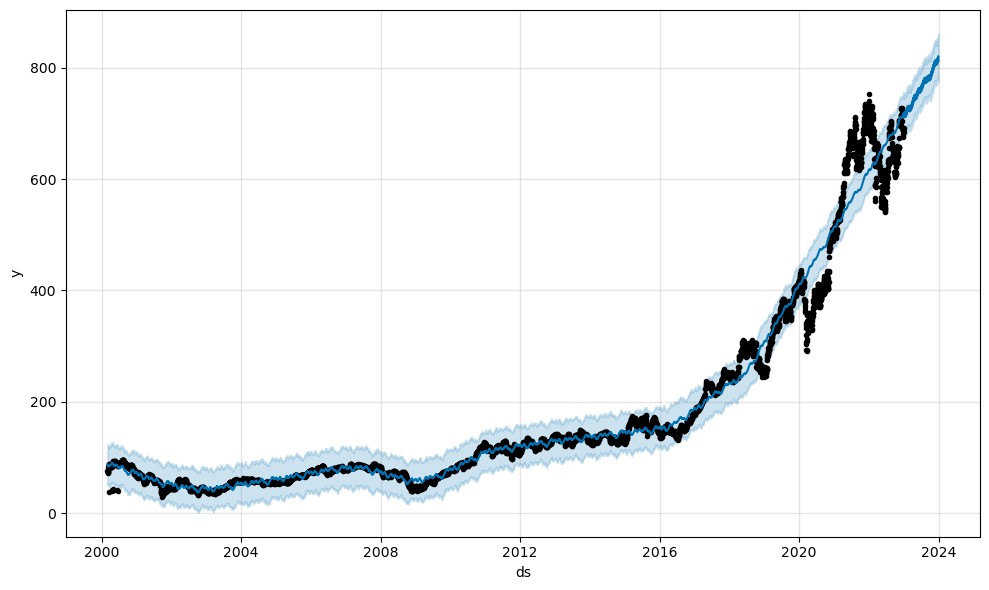

In [62]:
# Renommer les colonnes en 'ds' et 'y' pour correspondre à la syntaxe de Prophet
data_model = data.rename(columns={'Date': 'ds', 'typical_price': 'y'})

# Créer un objet Prophet

prophet_model = Prophet()
# Entraîner le modèle

prophet_model.fit(data_model)
# Prévoir les valeurs futures
future = m.make_future_dataframe(periods=365)  # Prévoir 365 jours dans le futur
forecast = m.predict(future)

# Afficher les prévisions
fig = m.plot(forecast)

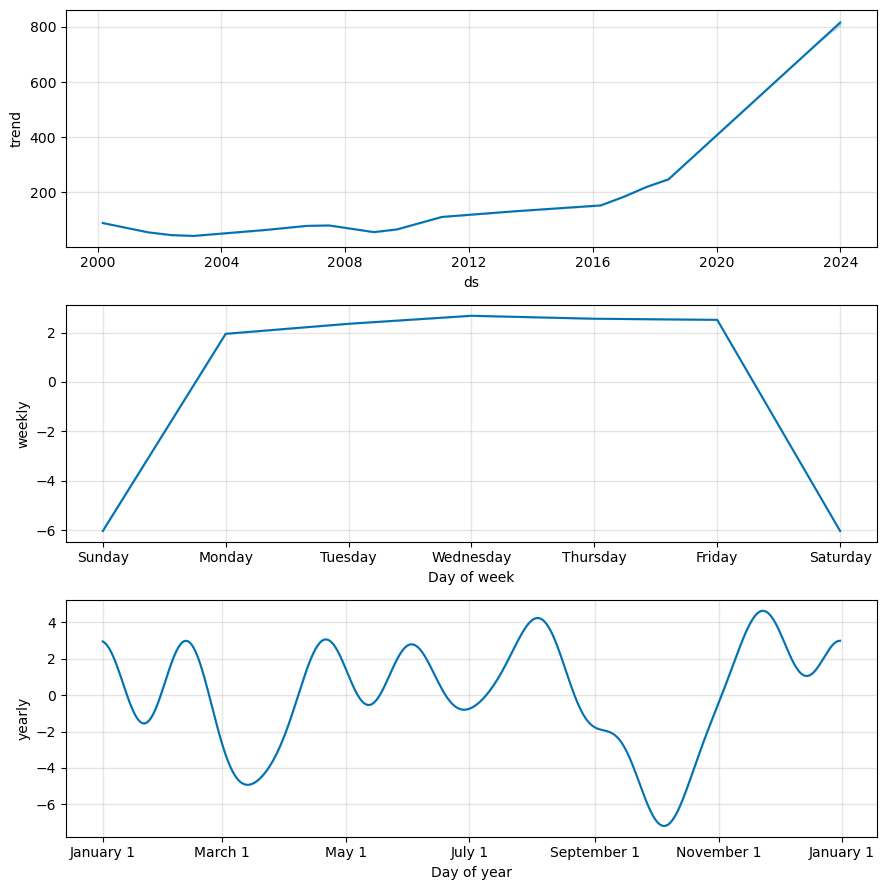

In [63]:
# Affichage des composantes du modéle: tendance, saisonnalité
m.plot_components(forecast)
plt.show()

In [64]:
# Application de la validation croisée de la série temporelle pour mesurer l’erreur de prévision
data_cv = cross_validation(prophet_model, initial='90 days', period='30 days', horizon = '30 days')


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/274 [00:00<?, ?it/s]

17:08:59 - cmdstanpy - INFO - Chain [1] start processing
17:08:59 - cmdstanpy - INFO - Chain [1] done processing
17:08:59 - cmdstanpy - INFO - Chain [1] start processing
17:08:59 - cmdstanpy - INFO - Chain [1] done processing
17:08:59 - cmdstanpy - INFO - Chain [1] start processing
17:08:59 - cmdstanpy - INFO - Chain [1] done processing
17:09:00 - cmdstanpy - INFO - Chain [1] start processing
17:09:00 - cmdstanpy - INFO - Chain [1] done processing
17:09:00 - cmdstanpy - INFO - Chain [1] start processing
17:09:00 - cmdstanpy - INFO - Chain [1] done processing
17:09:00 - cmdstanpy - INFO - Chain [1] start processing
17:09:00 - cmdstanpy - INFO - Chain [1] done processing
17:09:00 - cmdstanpy - INFO - Chain [1] start processing
17:09:00 - cmdstanpy - INFO - Chain [1] done processing
17:09:00 - cmdstanpy - INFO - Chain [1] start processing
17:09:00 - cmdstanpy - INFO - Chain [1] done processing
17:09:01 - cmdstanpy - INFO - Chain [1] start processing
17:09:01 - cmdstanpy - INFO - Chain [1]

17:09:30 - cmdstanpy - INFO - Chain [1] done processing
17:09:30 - cmdstanpy - INFO - Chain [1] start processing
17:09:30 - cmdstanpy - INFO - Chain [1] done processing
17:09:30 - cmdstanpy - INFO - Chain [1] start processing
17:09:31 - cmdstanpy - INFO - Chain [1] done processing
17:09:31 - cmdstanpy - INFO - Chain [1] start processing
17:09:32 - cmdstanpy - INFO - Chain [1] done processing
17:09:32 - cmdstanpy - INFO - Chain [1] start processing
17:09:32 - cmdstanpy - INFO - Chain [1] done processing
17:09:33 - cmdstanpy - INFO - Chain [1] start processing
17:09:33 - cmdstanpy - INFO - Chain [1] done processing
17:09:34 - cmdstanpy - INFO - Chain [1] start processing
17:09:34 - cmdstanpy - INFO - Chain [1] done processing
17:09:34 - cmdstanpy - INFO - Chain [1] start processing
17:09:35 - cmdstanpy - INFO - Chain [1] done processing
17:09:35 - cmdstanpy - INFO - Chain [1] start processing
17:09:36 - cmdstanpy - INFO - Chain [1] done processing
17:09:36 - cmdstanpy - INFO - Chain [1] 

17:11:08 - cmdstanpy - INFO - Chain [1] done processing
17:11:08 - cmdstanpy - INFO - Chain [1] start processing
17:11:10 - cmdstanpy - INFO - Chain [1] done processing
17:11:10 - cmdstanpy - INFO - Chain [1] start processing
17:11:13 - cmdstanpy - INFO - Chain [1] done processing
17:11:13 - cmdstanpy - INFO - Chain [1] start processing
17:11:16 - cmdstanpy - INFO - Chain [1] done processing
17:11:17 - cmdstanpy - INFO - Chain [1] start processing
17:11:18 - cmdstanpy - INFO - Chain [1] done processing
17:11:19 - cmdstanpy - INFO - Chain [1] start processing
17:11:20 - cmdstanpy - INFO - Chain [1] done processing
17:11:20 - cmdstanpy - INFO - Chain [1] start processing
17:11:22 - cmdstanpy - INFO - Chain [1] done processing
17:11:23 - cmdstanpy - INFO - Chain [1] start processing
17:11:25 - cmdstanpy - INFO - Chain [1] done processing
17:11:25 - cmdstanpy - INFO - Chain [1] start processing
17:11:27 - cmdstanpy - INFO - Chain [1] done processing
17:11:27 - cmdstanpy - INFO - Chain [1] 

17:15:23 - cmdstanpy - INFO - Chain [1] done processing
17:15:24 - cmdstanpy - INFO - Chain [1] start processing
17:15:27 - cmdstanpy - INFO - Chain [1] done processing
17:15:27 - cmdstanpy - INFO - Chain [1] start processing
17:15:31 - cmdstanpy - INFO - Chain [1] done processing
17:15:31 - cmdstanpy - INFO - Chain [1] start processing
17:15:36 - cmdstanpy - INFO - Chain [1] done processing
17:15:36 - cmdstanpy - INFO - Chain [1] start processing
17:15:39 - cmdstanpy - INFO - Chain [1] done processing
17:15:40 - cmdstanpy - INFO - Chain [1] start processing
17:15:42 - cmdstanpy - INFO - Chain [1] done processing
17:15:43 - cmdstanpy - INFO - Chain [1] start processing
17:15:47 - cmdstanpy - INFO - Chain [1] done processing
17:15:48 - cmdstanpy - INFO - Chain [1] start processing
17:15:51 - cmdstanpy - INFO - Chain [1] done processing
17:15:52 - cmdstanpy - INFO - Chain [1] start processing
17:15:55 - cmdstanpy - INFO - Chain [1] done processing
17:15:55 - cmdstanpy - INFO - Chain [1] 

In [65]:
# Affichage de la table des prévisions
data_cv.head()

ds       yhat  yhat_lower  yhat_upper          y     cutoff
0 2000-06-29  95.554940   79.638631  110.498082  89.573331 2000-06-28
1 2000-06-30  89.112274   74.060575  104.885408  86.973333 2000-06-28
2 2000-07-03  66.236111   50.849925   81.503514  86.483335 2000-06-28
3 2000-07-04  69.229858   54.415906   84.366741  85.866664 2000-06-28
4 2000-07-05  60.985504   45.864231   75.705865  87.466667 2000-06-28

In [66]:
# Affichage des erreurs de prévisions 
data_p = performance_metrics(data_cv)
data_p.head()

horizon          mse       rmse        mae      mape     mdape     smape  \
0  3 days  1098.335765  33.141149  18.890114  0.098517  0.084478  0.100879   
1  4 days  1117.555175  33.429855  19.110642  0.099820  0.085110  0.102297   
2  5 days  1143.917621  33.821851  19.424590  0.101566  0.084768  0.104152   
3  6 days  1161.787146  34.084999  19.678273  0.103772  0.087889  0.106465   
4  7 days  1179.720975  34.347066  19.828992  0.105671  0.090375  0.108707   

   coverage  
0  0.451389  
1  0.447700  
2  0.444282  
3  0.432970  
4  0.424351

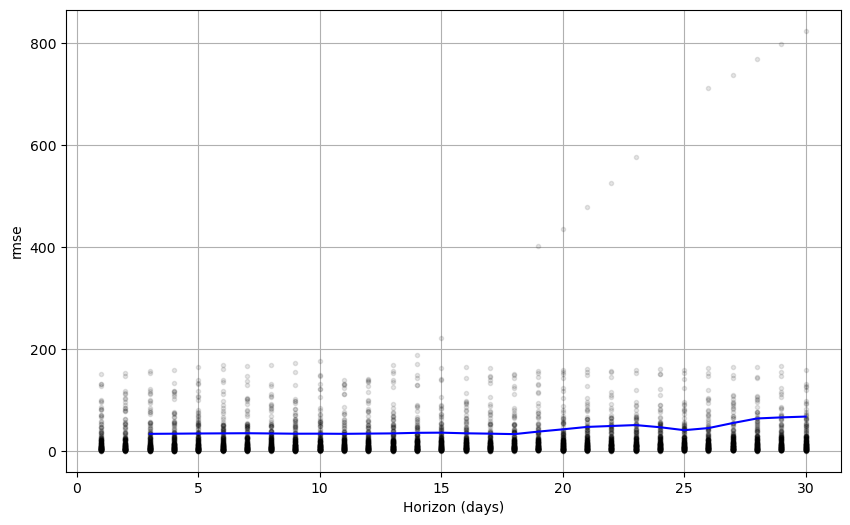

In [68]:
fig = plot_cross_validation_metric(data_cv, metric='rmse')
fig.axes[0].lines[0].set_color('black')

### Nous voyons que l’erreur est  linéairement stable en fonction de la période de prévision. Ainsi, avec cette configuration nous pourrons avoir des prévisions fiables sur une période inférieure à 15j.